<a href="https://colab.research.google.com/github/Maralmaa1/DIV-tasks/blob/main/House_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Problem 1] Selection of features for practice

After loading the dataset, extract the explanatory variables GrLivArea and YearBuilt, and the objective variable SalePrice.



In [2]:
import pandas as pd
import numpy as np

house_data = pd.read_csv('train.csv')
house_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
df = house_data.loc[:,['GrLivArea', 'YearBuilt', 'SalePrice']]
data = house_data.loc[:,['GrLivArea','YearBuilt']].to_numpy()
target = house_data.loc[:,['SalePrice']].to_numpy()
     
df

,GrLivArea,YearBuilt,SalePrice
0,1710,2003,208500
1,1262,1976,181500
2,1786,2001,223500
3,1717,1915,140000
4,2198,2000,250000
...,...,...,...
1455,1647,1999,175000
1456,2073,1978,210000
1457,2340,1941,266500
1458,1078,1950,142125


In [4]:
df.describe()

,GrLivArea,YearBuilt,SalePrice
count,1460.000000,1460.000000,1460.000000
mean,1515.463699,1971.267808,180921.195890
std,525.480383,30.202904,79442.502883
min,334.000000,1872.000000,34900.000000
25%,1129.500000,1954.000000,129975.000000
50%,1464.000000,1973.000000,163000.000000
75%,1776.750000,2000.000000,214000.000000
max,5642.000000,2010.000000,755000.000000


[Problem 2] Estimation and evaluation by linear regression

Easily analyze and preprocess data, create and execute a series of processes from linear regression learning, estimation, evaluation, and visualization.

In [5]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

lr = LinearRegression()
data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.2, random_state=123)
lr.fit(data_train, target_train)

target_pred = lr.predict(data_test)
target_pred


array([[260287.93436609],
       [127445.68143704],
       [233560.24201801],
       [262733.57179625],
       [156185.22266919],
       [217250.03154484],
       [301733.25658003],
       [135577.32499612],
       [136196.83512508],
       [182917.01633568],
       [179131.7868435 ],
       [239585.94550606],
       [176361.79258723],
       [125095.7757212 ],
       [266778.27045086],
       [172975.4877644 ],
       [191879.73258283],
       [278304.25848495],
       [242293.51288969],
       [181532.79872507],
       [135887.0800606 ],
       [199330.99817536],
       [114113.08944548],
       [122259.25327388],
       [242420.00716234],
       [166789.24639066],
       [206310.33029035],
       [225144.02709164],
       [106613.99874195],
       [149209.17160893],
       [148595.32183343],
       [211139.17827802],
       [133348.99197084],
       [194786.8030473 ],
       [237324.38913142],
       [214501.11966734],
       [171046.40936038],
       [286867.96857044],
       [1570

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

scaler = StandardScaler()
data_train = scaler.fit_transform(data_train)
data_test = scaler.fit_transform(data_test)

l_reg = LinearRegression().fit(data_train, target_train)
y_pred = l_reg.predict(data_test)
mse = mean_squared_error(target_test, target_pred)
print('mean squared error is {}'.format(mse))
mse = mean_squared_error(target_test, target_pred, squared= False)
print('mean squared error is {}'.format(mse))


mean squared error is 1907504023.4791675
mean squared error is 43674.98166547031


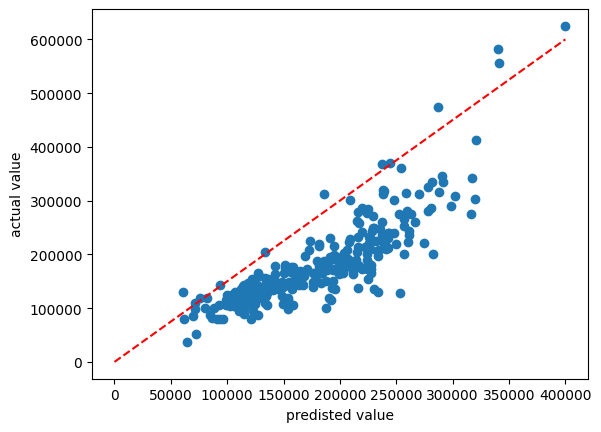

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(target_pred, target_test)
ax.plot((0, 400000), (0, 600000), linestyle='dashed', color='red')
ax.set_xlabel('predisted value')
ax.set_ylabel('actual value')
plt.show()

[Problem 3] Comparison of methods

Please learn, estimate, evaluate, and visualize all of the following methods. Then, summarize the index values ​​in one table. Briefly discuss the results using the table and visualization. Please state which method was good for which index value and what kind of figure it was.

* linear regression
* SVM
* decision tree
* random forest

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-14-4979353cf4c4>:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_reg.fit(data_train, target_train)


svm predict: root mean square error:80056.1040697858
dtree predict: root mean square error:54738.61698525918
random forest predict: root mean square error:42726.58522193945


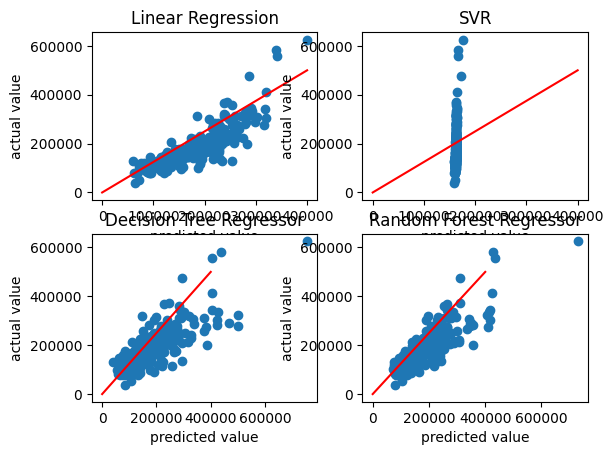

In [14]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

svm = SVR(kernel = 'poly')
svm.fit(data_train, target_train)
svm_pred = svm.predict(data_test)
mse = mean_squared_error(target_test, svm_pred, squared= False)
print("svm predict: root mean square error:{}".format(mse))


dt_reg = DecisionTreeRegressor(random_state=0)
dt_reg.fit(data_train, target_train)
dt_reg_pred = dt_reg.predict(data_test)
mse = mean_squared_error(target_test, dt_reg_pred, squared= False)
print("dtree predict: root mean square error:{}".format(mse))


rf_reg = RandomForestRegressor()
rf_reg.fit(data_train, target_train)
rf_reg_pred = rf_reg.predict(data_test)
mse = mean_squared_error(target_test, rf_reg_pred, squared= False)
print("random forest predict: root mean square error:{}".format(mse))


fig, ax = plt.subplots(2,2)
ax[0,0].scatter(target_pred, target_test)
ax[0,0].plot((0, 400000), (0, 500000), color='red')
ax[0,0].set_xlabel('predicted value')
ax[0,0].set_ylabel('actual value')
ax[0,0].title.set_text('Linear Regression')

ax[0,1].scatter(svm_pred, target_test)
ax[0,1].plot((0, 400000), (0, 500000), color='red')
ax[0,1].set_xlabel('predicted value')
ax[0,1].set_ylabel('actual value')
ax[0,1].title.set_text('SVR')

ax[1,0].plot((0, 400000), (0, 500000), color='red')
ax[1,0].scatter(dt_reg_pred, target_test)
ax[1,0].set_xlabel('predicted value')
ax[1,0].set_ylabel('actual value')
ax[1,0].title.set_text('Decision Tree Regressor')

ax[1,1].scatter(rf_reg_pred, target_test)
ax[1,1].plot((0, 400000), (0, 500000), color='red')
ax[1,1].set_xlabel('predicted value')
ax[1,1].set_ylabel('actual value')
ax[1,1].title.set_text('Random Forest Regressor')
plt.show()


Null values of the data is 
GrLivArea    0
YearBuilt    0
LotArea      0
SalePrice    0
dtype: int64
Feature added: root mean square error:1788152399.389184
Feature added: root mean square error:42286.55104627456


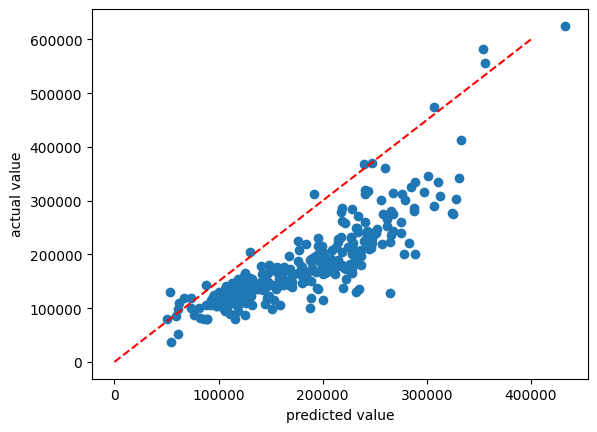

In [17]:
df = house_data.loc[:,['GrLivArea', 'YearBuilt' , 'LotArea','SalePrice']]

print("Null values of the data is \n{}".format(df.isnull().sum()))


data = df.loc[:,['GrLivArea', 'YearBuilt', 'LotArea']].to_numpy()
target = df.loc[:, 'SalePrice'].to_numpy()

# Estimation and evaluation by linear regression
data_train, data_test, target_train, target_test = train_test_split(data, target, random_state=123, test_size=0.2)

scaler = StandardScaler()
data_train = scaler.fit_transform(data_train)
data_test = scaler.fit_transform(data_test)

reg = LinearRegression().fit(data_train, target_train)
target_pred = reg.predict(data_test)
mse = mean_squared_error(target_test, target_pred)
print("Feature added: root mean square error:{}".format(mse))
mse = mean_squared_error(target_test, target_pred, squared= False)
print("Feature added: root mean square error:{}".format(mse))

fig, ax = plt.subplots()
ax.scatter(target_pred, target_test)
ax.plot((0, 400000), (0, 600000), linestyle='dashed', color='red')
ax.set_xlabel('predicted value')
ax.set_ylabel('actual value')
plt.show()